In [49]:
#imports
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
%config IPCompleter.greedy=True

In [51]:
#dataset
PATH_1 = ("DatasetsImmo/immozip_oneHot.csv")
PATH_2 = ("DatasetsImmo/RA_immoZip.csv")

In [52]:
immo_classic = pd.read_csv(PATH_2)
immo_classic.drop("Unnamed: 0",inplace= True,axis=1)
print("immo_classic ={}".format(immo_classic.shape))

immo_classic =(11865, 22)


In [53]:
immo_one_hot = pd.read_csv(PATH_1)
immo_one_hot.drop("Unnamed: 0",inplace= True,axis=1)
print("immo_one_hot.shape ={}".format(immo_one_hot.shape))

immo_one_hot.shape =(11865, 62)


In [54]:
immo_one_hot.head(3)

,price,constructionYear,room_number,mètres carrés,prix mètres carrés,parking extérieur,atticExists,basementExists,hasSwimmingPool,zip,...,condition_is_to be done up,condition_is_to renovate,condition_is_to restore,heatingType_is_carbon,heatingType_is_electric,heatingType_is_fueloil,heatingType_is_gas,heatingType_is_pellet,heatingType_is_solar,heatingType_is_wood
0,1550000,2017.0,3.0,213,7277.00,1.0,False,False,False,1050,...,0,0,0,0,0,0,1,0,0,0
1,495000,1960.0,3.0,120,4125.00,0.0,False,True,False,1050,...,0,0,0,0,0,0,1,0,0,0
2,1537000,2015.0,2.0,160,9606.25,1.0,False,True,False,1050,...,0,0,0,0,0,0,1,0,0,0


In [90]:
immo_classic["parking extérieur"].astype(int)

constructionYear
1933-01-01     2
1974-01-01     4
1974-01-01     4
1974-01-01     4
1974-01-01     4
              ..
1918-01-01    20
1918-01-01    20
2003-01-01     6
2003-01-01     6
2003-01-01     6
Name: parking extérieur, Length: 11865, dtype: int32

(array([2.001e+03, 5.459e+03, 1.876e+03, 9.230e+02, 4.270e+02, 2.960e+02,
        1.610e+02, 1.570e+02, 1.490e+02, 6.900e+01, 6.000e+01, 2.400e+01,
        5.600e+01, 3.800e+01, 1.400e+01, 6.000e+01, 2.100e+01, 2.500e+01,
        9.000e+00, 4.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([  15000.,  204700.,  394400.,  584100.,  773800.,  963500.,
        1153200., 1342900., 1532600., 1722300., 1912000., 2101700.,
        2291400., 2481100., 2670800., 2860500., 3050200., 3239900.,
        3429600., 3619300., 3809000., 3998700., 4188400., 4378100.,
        4567800., 4757500., 4947200., 5136900., 5326600., 5516300.,
        5706000., 5895700., 6085400.

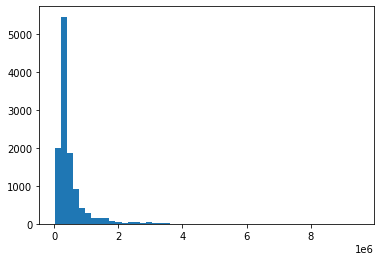

In [88]:
plt.hist(immo_classic["price"],bins=50)

In [55]:
immo_classic.min()

price                                15000
type                             apartment
subtype                          apartment
constructionYear                      1763
condition                           as new
room_number                              0
cuisine_type                hyper equipped
heatingType                         carbon
mètres carrés                            1
prix mètres carrés                   92.59
parking extérieur                        0
atticExists                          False
basementExists                       False
hasSwimmingPool                      False
zip                                   1000
city                        's Gravenwezel
municipalities                     Antwerp
parking intérieur                        0
lng                                2.58067
lat                                49.5377
id                                 5582833
company_name          1st quality vastgoed
dtype: object

###### Drop Outlier

[Snippet](https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32)

In [56]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [57]:
immo_classic.price.max()

9500000

In [58]:
immo_classic.price.min()

15000

In [59]:
price_outliers = detect_outlier(immo_classic.price)

In [60]:
price_outliers

[2500000,
 2500000,
 3324000,
 3297000,
 2500000,
 3370000,
 2650000,
 3370000,
 3297000,
 3324000,
 4950000,
 3800000,
 3900000,
 2485000,
 2190000,
 2200000,
 3495000,
 4950000,
 3495000,
 2295000,
 3495000,
 3900000,
 2750000,
 5200000,
 2950000,
 2950000,
 2500000,
 2250000,
 3295000,
 3295000,
 2950000,
 2750000,
 4200000,
 4200000,
 2895000,
 2590000,
 2350000,
 2495000,
 2495000,
 2495000,
 2450000,
 2400000,
 2600000,
 2450000,
 2450000,
 4200000,
 2350000,
 4500000,
 2950000,
 2950000,
 2495000,
 2495000,
 2495000,
 2695000,
 2695000,
 2695000,
 3200000,
 3200000,
 3200000,
 2200000,
 2200000,
 2200000,
 2650000,
 2650000,
 2650000,
 2495000,
 2495000,
 2495000,
 3200000,
 3200000,
 3200000,
 2975000,
 2975000,
 2975000,
 2350000,
 2350000,
 2350000,
 2395000,
 2395000,
 2395000,
 2295000,
 2295000,
 2295000,
 2975000,
 2975000,
 2975000,
 2975000,
 2975000,
 2975000,
 3200000,
 3200000,
 3200000,
 2850000,
 2850000,
 2850000,
 3595000,
 3595000,
 3595000,
 2350000,
 2350000,


In [61]:
outliers =  immo_classic[immo_classic.price.isin(price_outliers)]

 > So now we can get the min outliers and the max then subsetting those values from our datas

In [62]:
min_outliers= outliers.price.min()
min_outliers

2190000

In [63]:
max_outliers= outliers.price.max()
max_outliers

9500000

In [64]:
immo_classic_no_big_outliers = immo_classic[immo_classic["price"] < max_outliers]

In [65]:
immo_classic_no_big_outliers.price.max()

6500000

# Using IQR

IQR tells how spread the middle values are. It can be used to tell when a value is too far from the middle.
An outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.

##  step 1:
- Arrange the data in increasing order
- Calculate first(q1) and third quartile(q3)
- Find interquartile range (q3-q1)
- Find lower bound q1*1.5
- Find upper bound q3*1.5
- Anything that lies outside of lower and upper bound is an outlier

First sorting the dataset

In [66]:
immo_classic.sort_values(by="price",axis=0,ascending=True,inplace= True)

Finding first quartile and third quartile

In [67]:
q1, q3= np.percentile(immo_classic.price,[25,75])

Find the IQR which is the difference between third and first quartile

In [91]:
q1

235000.0

In [92]:
q3

500000.0

In [93]:
iqr = q3 - q1
iqr

265000.0

Find lower and upper bound

In [97]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

In [98]:
lower_bound

-162500.0

In [99]:
upper_bound 

897500.0

## How to Calculate the Confidence Interval?
The interval is calculated using the following steps:

1. Gather the sample data.
2. Calculate the sample mean x̅.
3. Determine whether a population’s standard deviation is known or unknown.
4. If a population’s standard deviation is known, we can use a z-score for the corresponding confidence level.
5. If a population’s standard deviation is unknown, we can use a t-statistic for the corresponding confidence level.
6. Find the lower and upper bounds of the confidence interval using the following formulas:

- a. Known population standard deviation
![alt text](https://cdn.corporatefinanceinstitute.com/assets/confidence-interval1.png)

 - b. Unknown population standard deviation

![alt text](https://cdn.corporatefinanceinstitute.com/assets/confidence-

# Dates stuff

In [74]:
immo_classic.dtypes

price                   int64
type                   object
subtype                object
constructionYear      float64
condition              object
room_number           float64
cuisine_type           object
heatingType            object
mètres carrés           int64
prix mètres carrés    float64
parking extérieur     float64
atticExists              bool
basementExists           bool
hasSwimmingPool          bool
zip                     int64
city                   object
municipalities         object
parking intérieur     float64
lng                   float64
lat                   float64
id                      int64
company_name           object
dtype: object

In [75]:
immo_classic.constructionYear.astype("str")

11061    1933.0
9551     1974.0
9550     1974.0
9549     1974.0
9548     1974.0
          ...  
9898     1918.0
9903     1918.0
1868     2003.0
1867     2003.0
1866     2003.0
Name: constructionYear, Length: 11865, dtype: object

In [76]:
immo_classic.constructionYear = pd.to_datetime(immo_classic.constructionYear,format="%Y")

In [77]:
immo_classic.constructionYear

11061   1933-01-01
9551    1974-01-01
9550    1974-01-01
9549    1974-01-01
9548    1974-01-01
           ...    
9898    1918-01-01
9903    1918-01-01
1868    2003-01-01
1867    2003-01-01
1866    2003-01-01
Name: constructionYear, Length: 11865, dtype: datetime64[ns]

In [78]:
immo_classic.dtypes

price                          int64
type                          object
subtype                       object
constructionYear      datetime64[ns]
condition                     object
room_number                  float64
cuisine_type                  object
heatingType                   object
mètres carrés                  int64
prix mètres carrés           float64
parking extérieur            float64
atticExists                     bool
basementExists                  bool
hasSwimmingPool                 bool
zip                            int64
city                          object
municipalities                object
parking intérieur            float64
lng                          float64
lat                          float64
id                             int64
company_name                  object
dtype: object

In [79]:
immo_classic= immo_classic.set_index("constructionYear")

In [80]:
immo_classic.index.has_duplicates

True

In [81]:
immo_classic.sort_index(ascending = True).head()

,price,type,subtype,condition,room_number,cuisine_type,heatingType,mètres carrés,prix mètres carrés,parking extérieur,...,basementExists,hasSwimmingPool,zip,city,municipalities,parking intérieur,lng,lat,id,company_name
constructionYear,,,,,,,,,,,,,,,,,,,,,
1763-01-01,159000,house,house,to renovate,5.0,semi equipped,fueloil,5,31800.0,0.0,...,True,False,6460,Salles,Hainaut,1.0,4.247403,50.056010,8562215,confort invest
1763-01-01,159000,house,house,to renovate,5.0,semi equipped,fueloil,5,31800.0,0.0,...,True,False,6460,Saint-Remy,Hainaut,1.0,4.309222,50.050354,8562215,confort invest
1763-01-01,159000,house,house,to renovate,5.0,semi equipped,fueloil,5,31800.0,0.0,...,True,False,6460,Robechies,Hainaut,1.0,4.278378,50.072802,8562215,confort invest
1763-01-01,159000,house,house,to renovate,5.0,semi equipped,fueloil,5,31800.0,0.0,...,True,False,6460,Chimay,Hainaut,1.0,4.317334,50.047927,8562215,confort invest
1763-01-01,159000,house,house,to renovate,5.0,semi equipped,fueloil,5,31800.0,0.0,...,True,False,6460,Bailièvre,Hainaut,1.0,4.238617,50.069276,8562215,confort invest


In [82]:
immo_classic_year= immo_classic.resample('A').mean()

In [83]:
immo_classic_year.head()

,price,room_number,mètres carrés,prix mètres carrés,parking extérieur,atticExists,basementExists,hasSwimmingPool,zip,parking intérieur,lng,lat,id
constructionYear,,,,,,,,,,,,,
1763-12-31,159000.0,5.0,5.0,31800.0,0.0,0.0,1.0,0.0,6460.0,1.0,4.275637,50.05529,8562215.0
1764-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1765-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1766-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1767-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
immo_classic_year.tail()

,price,room_number,mètres carrés,prix mètres carrés,parking extérieur,atticExists,basementExists,hasSwimmingPool,zip,parking intérieur,lng,lat,id
constructionYear,,,,,,,,,,,,,
2019-12-31,460471.741748,2.619417,130.376699,11667.378155,1.551456,0.126214,0.236893,0.011650,6034.563107,0.458252,4.042292,50.914026,8.704223e+06
2020-12-31,333380.098642,2.518227,115.277341,14885.888892,1.419585,0.188706,0.142959,0.000715,5471.235883,0.777698,4.392742,50.849957,8.772417e+06
2021-12-31,335998.279661,2.194915,112.351695,8856.178178,0.224576,0.046610,0.177966,0.000000,4814.817797,0.512712,4.307428,50.919273,8.823709e+06
2022-12-31,443507.075472,1.933962,101.858491,6622.491887,2.084906,0.000000,0.603774,0.169811,2709.433962,0.481132,4.245390,50.896532,8.897208e+06
2023-12-31,532000.000000,3.000000,192.000000,2770.830000,0.000000,0.000000,0.000000,0.000000,8500.000000,1.000000,3.278415,50.817881,8.995173e+06


In [85]:
immo_classic_year.columns

Index(['price', 'room_number', 'mètres carrés', 'prix mètres carrés',
       'parking extérieur', 'atticExists', 'basementExists', 'hasSwimmingPool',
       'zip', 'parking intérieur', 'lng', 'lat', 'id'],
      dtype='object')

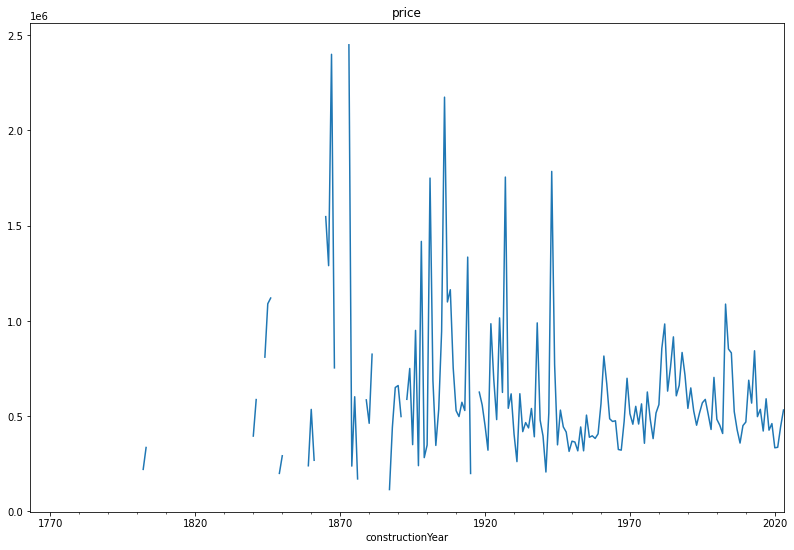

In [86]:
# makes the plot and assign it to a variable
appl_open = immo_classic_year['price'].plot(title = "price")

# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)